In [1]:
%matplotlib inline
import numpy as np
np.random.seed(23)

import matplotlib.pyplot as plt

import theano
from theano import tensor as T,function

from IPython import display
import time

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
noiseVar = .5
nSamples = 1000

n = np.random.normal(0,noiseVar,nSamples)
x = np.arange(nSamples)
x = (x - x.mean()) / x.std()
w,b = np.random.randn(2)

d = w * x + b
y = d + n

Text(0.5, 1.0, 'in-out map')

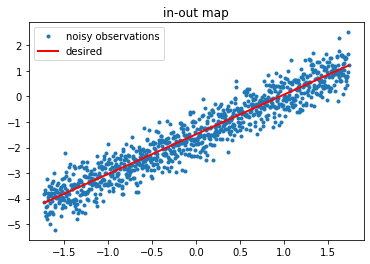

In [3]:
plt.plot(x,y,'.')
plt.plot(x,d,'-r',linewidth = 2.)
plt.legend(('noisy observations','desired'))
plt.title('in-out map')

In [4]:
X,Y = T.vectors('input','desired')
#X = actual inputs, Y = desired inputs
W = theano.shared(.01)
B = theano.shared(0.)
Z = W * X + B
Cost = ((Y - Z)**2).mean()
params = [W,B]

In [5]:
W.get_value()

array(0.01)

In [6]:
W

<TensorType(float64, scalar)>

In [7]:
updates = ((W,W * 2),)
doubleW = function([],[],updates = updates)

In [8]:
doubleW()
W.get_value()

array(0.02)

In [9]:
lr = .1
grads = [T.grad(Cost,p) for p in params]
updates = [(p,p - lr * g) for p,g in zip(params,grads)]

print(updates)

[(<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0), (<TensorType(float64, scalar)>, Elemwise{sub,no_inplace}.0)]


In [10]:
train = function([X,Y],Cost,updates = updates)

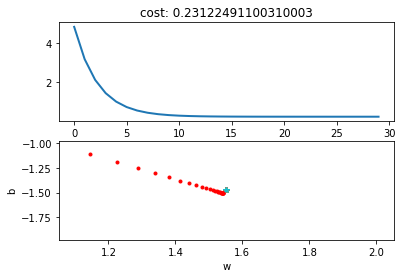

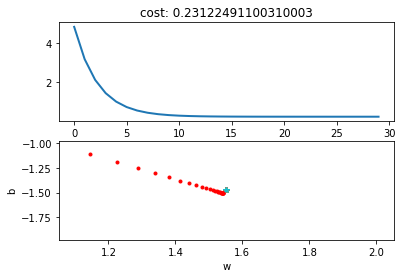

In [11]:
epochs = 30
finalCost = []
for i in range(epochs):
    finalCost.append(train(x,y))
    
    what,bhat = W.get_value(),B.get_value()
    
    plt.subplot(211)
    plt.cla()
    plt.title('cost: {}'.format(finalCost[-1]))
    plt.plot(finalCost,linewidth = 2.)
    
    plt.subplot(212)
    plt.plot(w,b,'*',linewidth = 2)
    plt.plot(what,bhat,'.r',linewidth = 2)
    plt.xlim(w - .5,w + .5)
    plt.ylim(b - .5,b + .5)
    plt.xlabel('w')
    plt.ylabel('b')
    
    display.clear_output(wait = True)
    display.display(plt.gcf())
    time.sleep(1.0)

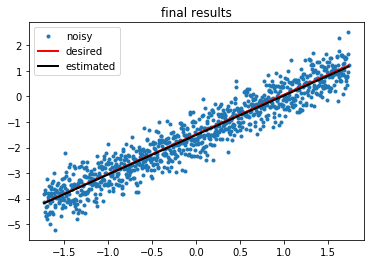

In [12]:
plt.title('final results')
plt.plot(x,y,'.')
plt.plot(x,d,'r',linewidth = 2)
plt.plot(x,what * x + bhat,'k',linewidth = 2)
plt.legend(('noisy','desired','estimated'))